# Bank Customer Churn EDA

## Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import imblearn

## Data Collection

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

## Data Analysis
- Check head/tail
- Check Data type + shape
- Check Missing Data
- Check Descriptive Statistics

### a) Check head/tail:

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### b) Check Data type + shape:

In [5]:
df.shape

(10000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### c) Check Missing Data:

In [7]:
### Checking for Missing data
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### d) Check Data Statistics (how the data is distributed)

In [8]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Cleaning
- Handling Missing values
- Handling Duplicates
- Data Consistency

### a) Handling Missing values:
- Deleting the Columns with missing data
  ---->(*df=df.dropna(axis=1)*)
- Deleting the Rows with missing data
  ---->(*df=df.dropna(axis=0)*)
- Missing numericals [Mean/ Median] AND Categorical [Mode]
  ---->(*num_col_mean=df[num_col].mean*)
  ---->(*df[num_col]=df[num_col].fillna(num_col_mean)*)


### b) Handling Duplicates:

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop_duplicates()
df.shape

(10000, 12)

### c) Data Consistency:

In [11]:
### Check the number of unique values of each column:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [12]:
#### Above we saw that 'country' and 'gender' has 3 and 2 unique categories respectively
#### Now we show those categories to inspect/discover the consistency
## Use: .value_counts() / .unique()
print("Categories in 'Country' variable:")
print(df['country'].unique())

print("Categories in 'Gender' variable:")
print(df['gender'].unique())

Categories in 'Country' variable:
['France' 'Spain' 'Germany']
Categories in 'Gender' variable:
['Female' 'Male']


##### If any inconsistency, do:
- Standard Cleaning: ---> df['particular_col']=df['particular_col'].str.strip()/ .lower()/ .title()
- Manual Mapping: ---> mapping={'ny': 'New York', 'nyc': 'New York'} ---> df['particular_col']=df['particular_col'].replace(mapping)

## Checking Target Distribution:

Text(0.5, 1.0, 'Distribution of Customer Churn')

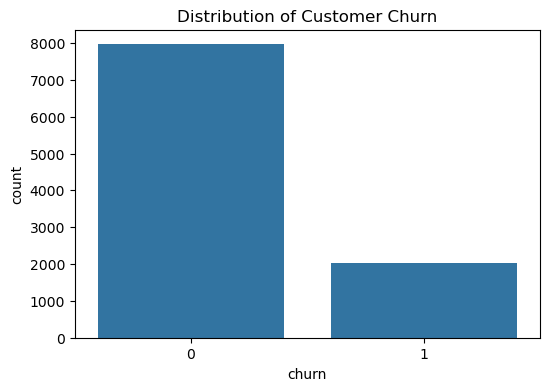

In [13]:
# 1. Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Customer Churn')

In [14]:
# Target value count
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

## Univariate Analysis

### *Univariate analysis on CATEGORICAL variables/values*

##### Country Variable Analysis

In [15]:
country_counts = df['country'].value_counts()

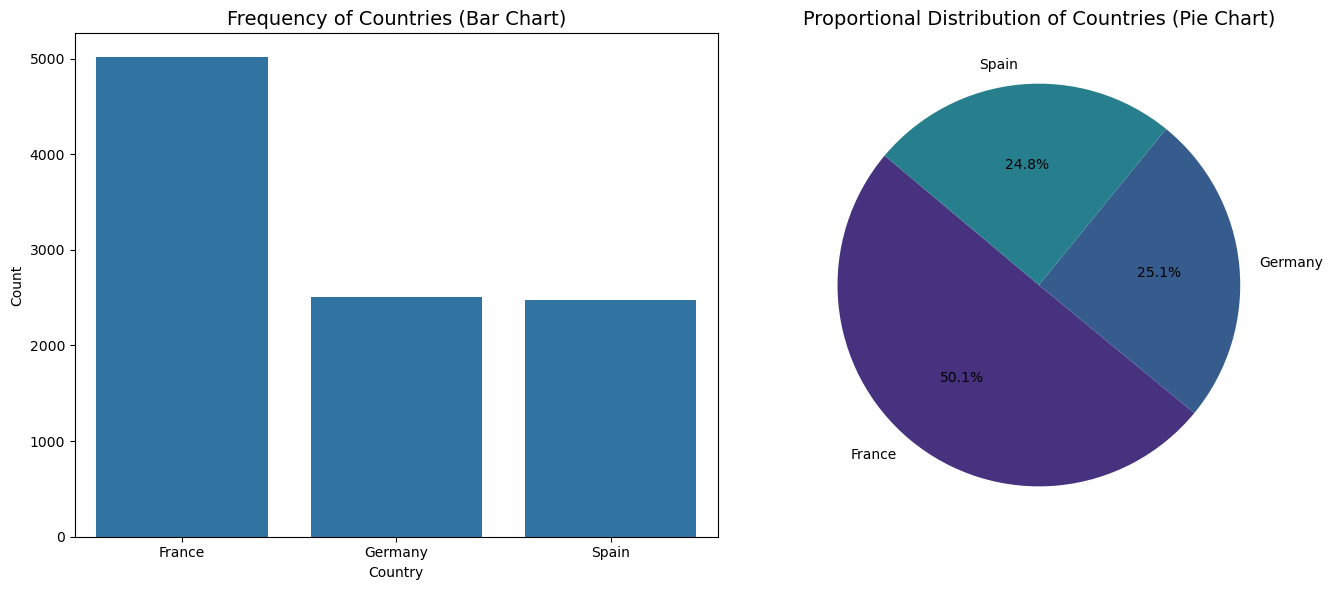

In [16]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# BAR CHART (Count Plot)
sns.countplot(data=df, x='country', ax=axes[0], order=country_counts.index)
axes[0].set_title('Frequency of Countries (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Count')
# PIE CHART
axes[1].pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of Countries (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

##### Gender Variable Analysis

In [17]:
gender_counts = df['gender'].value_counts()

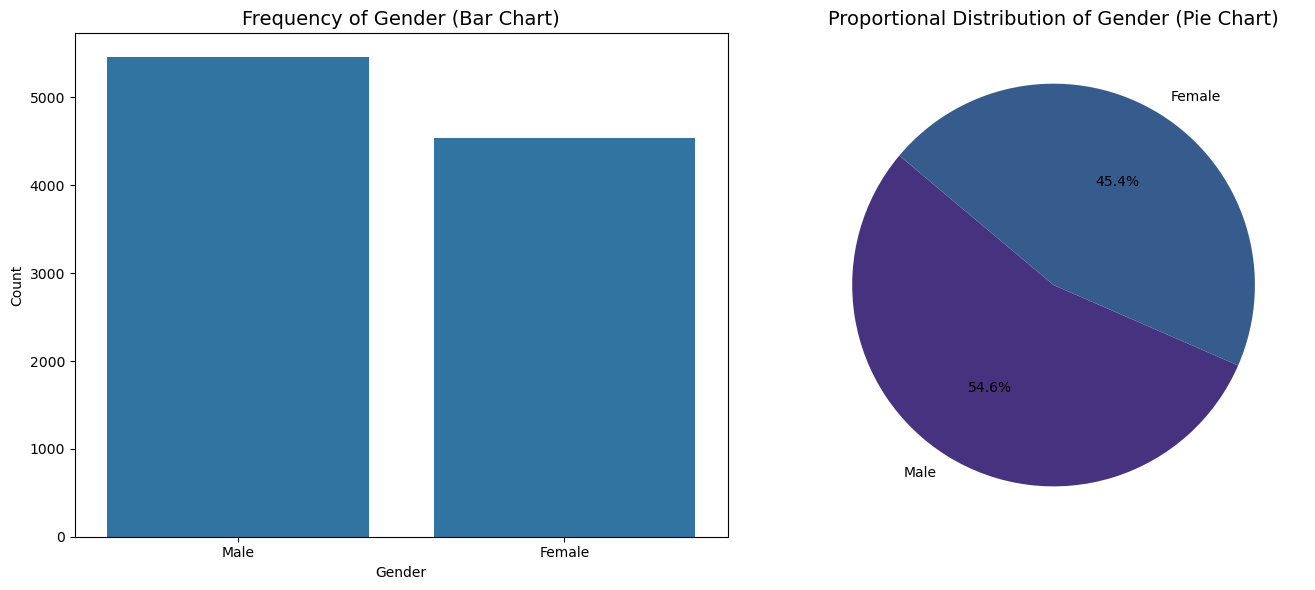

In [18]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BAR CHART (Count Plot) ---s
sns.countplot(data=df, x='gender', ax=axes[0], order=gender_counts.index)
axes[0].set_title('Frequency of Gender (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
# --- PIE CHART ---
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of Gender (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

#### Product number variable analysis

In [19]:
product_counts = df['products_number'].value_counts()

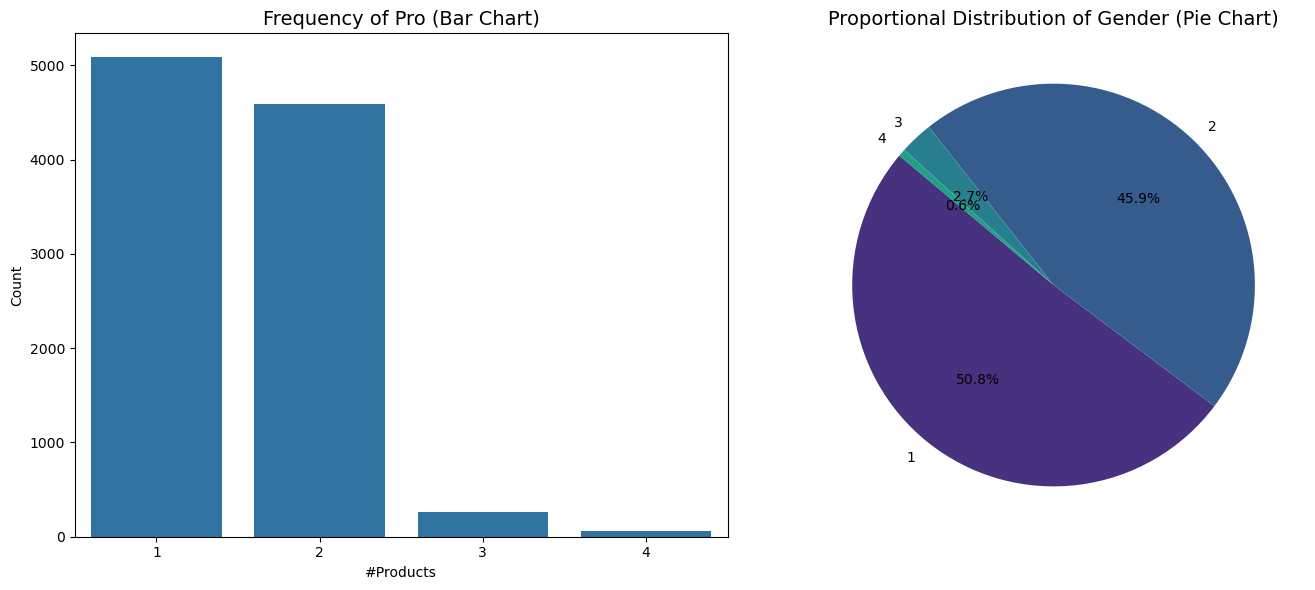

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BAR CHART (Count Plot) ---s
sns.countplot(data=df, x='products_number', ax=axes[0], order=product_counts.index)
axes[0].set_title('Frequency of Pro (Bar Chart)', fontsize=14)
axes[0].set_xlabel('#Products')
axes[0].set_ylabel('Count')
# --- PIE CHART ---
axes[1].pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of Gender (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

#### Credit card variable analysis

In [21]:
credit_counts = df['credit_card'].value_counts()

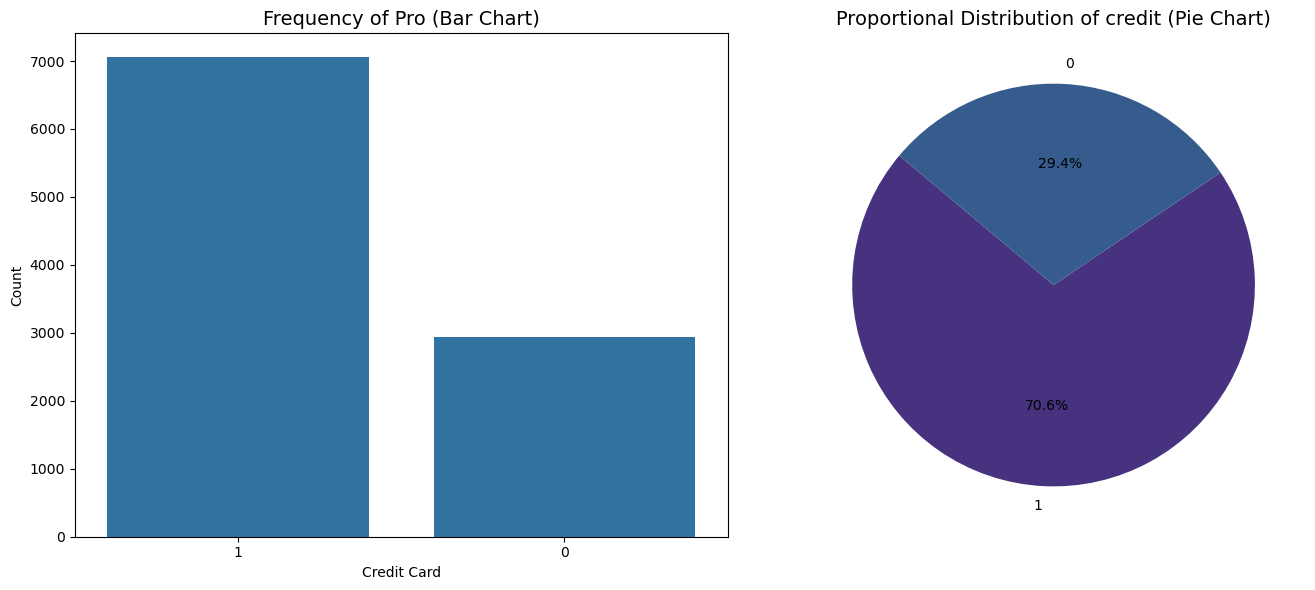

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BAR CHART (Count Plot) ---s
sns.countplot(data=df, x='credit_card', ax=axes[0], order=credit_counts.index)
axes[0].set_title('Frequency of Pro (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Credit Card')
axes[0].set_ylabel('Count')
# --- PIE CHART ---
axes[1].pie(credit_counts, labels=credit_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of credit (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

#### Active member variable analysis

In [23]:
member_counts = df['active_member'].value_counts()

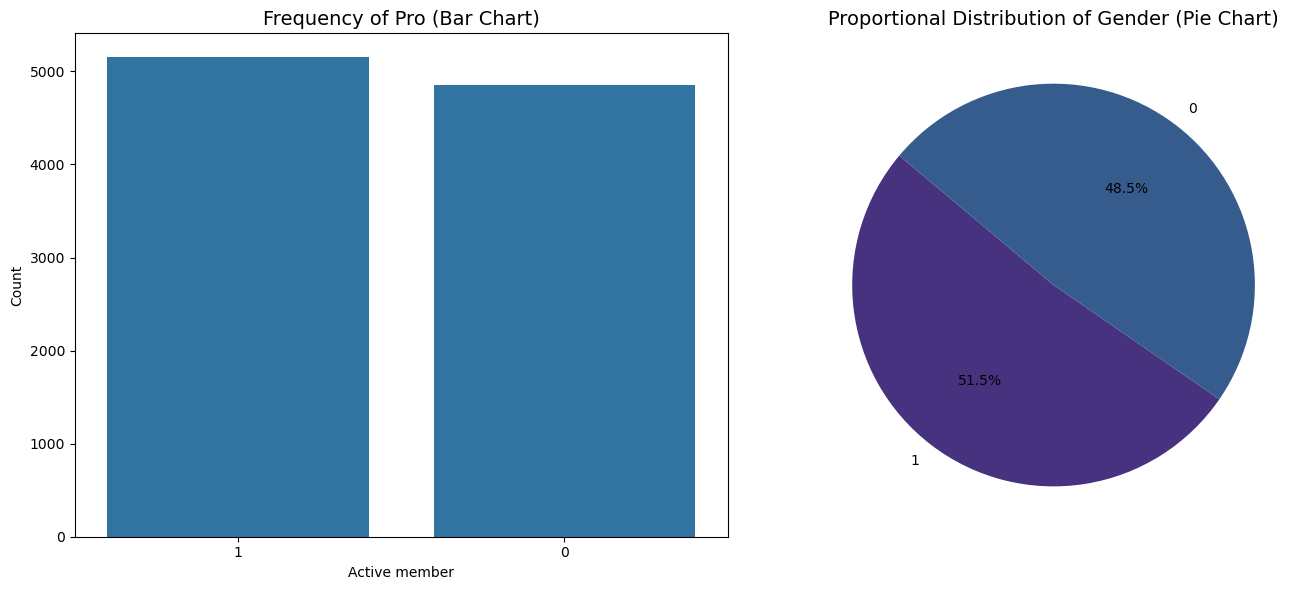

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BAR CHART (Count Plot) ---s
sns.countplot(data=df, x='active_member', ax=axes[0], order=member_counts.index)
axes[0].set_title('Frequency of Pro (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Active member')
axes[0].set_ylabel('Count')
# --- PIE CHART ---
axes[1].pie(member_counts, labels=member_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of Gender (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

#### Loan Tenure Variable analysis

In [25]:
tenure_counts = df['tenure'].value_counts()

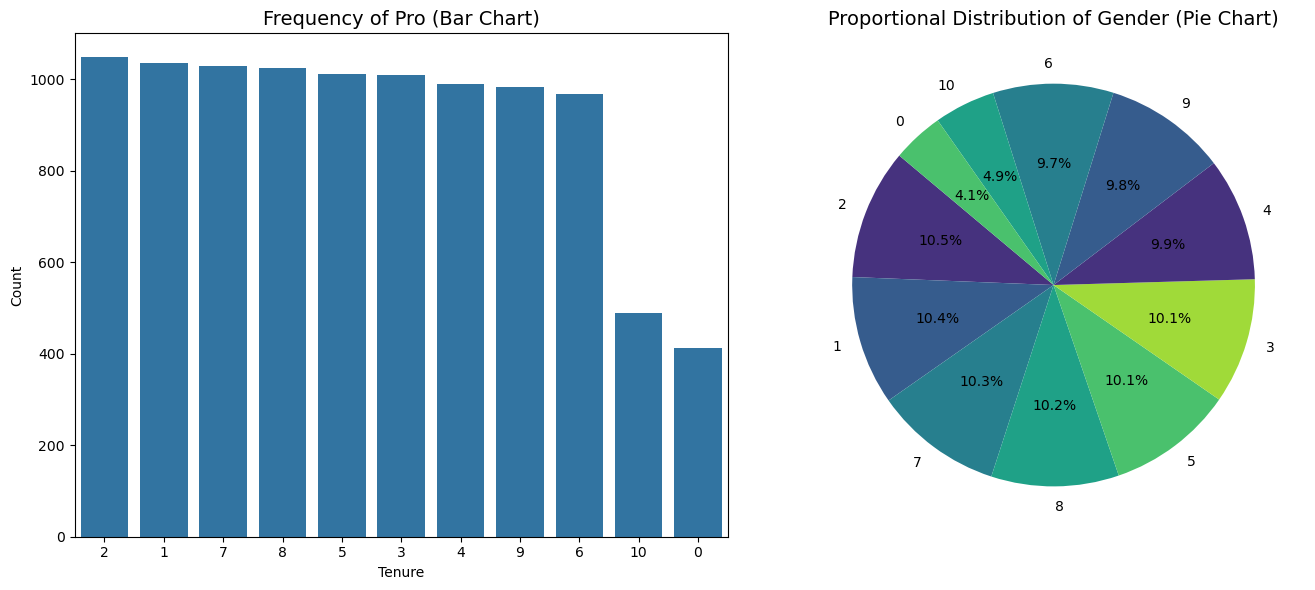

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BAR CHART (Count Plot) ---s
sns.countplot(data=df, x='tenure', ax=axes[0], order=tenure_counts.index)
axes[0].set_title('Frequency of Pro (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Count')
# --- PIE CHART ---
axes[1].pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of Gender (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

### *Univariate analysis on NUMERICAL variables/values*

##### Credit Score Variable Analysis

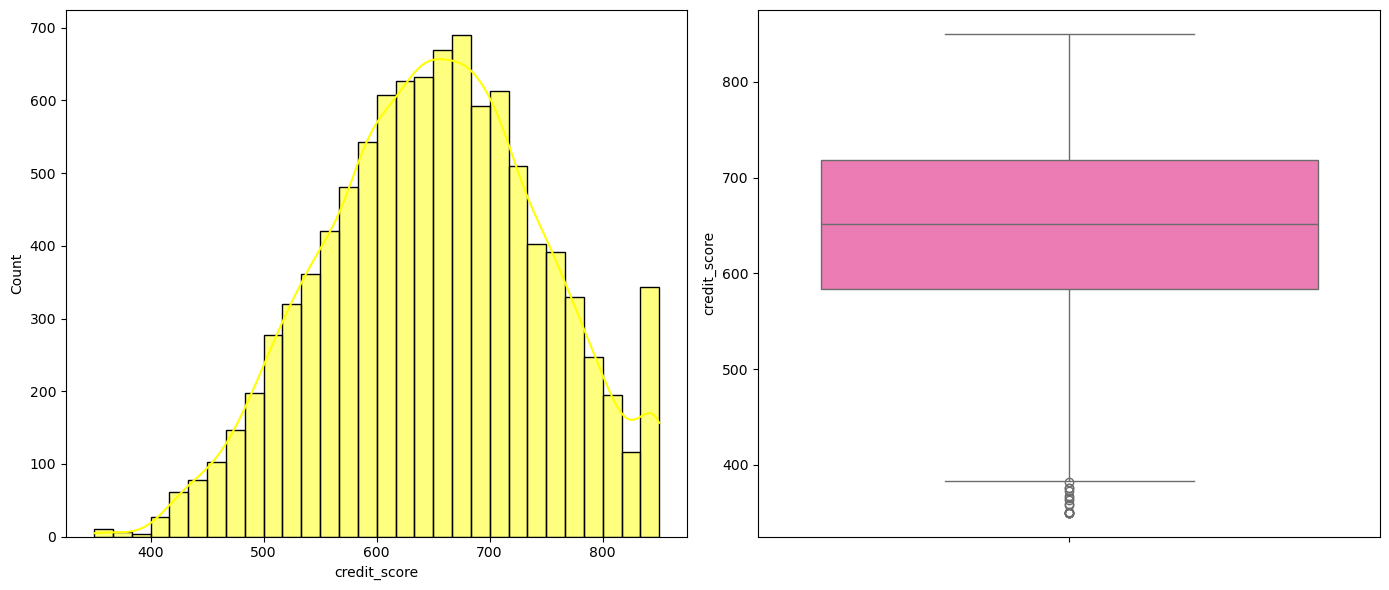

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=df, x='credit_score', bins=30,kde=True,color='yellow')
plt.subplot(122)
sns.boxplot(df['credit_score'],color='hotpink')

plt.tight_layout()
plt.show()

##### Age Variable Analysis

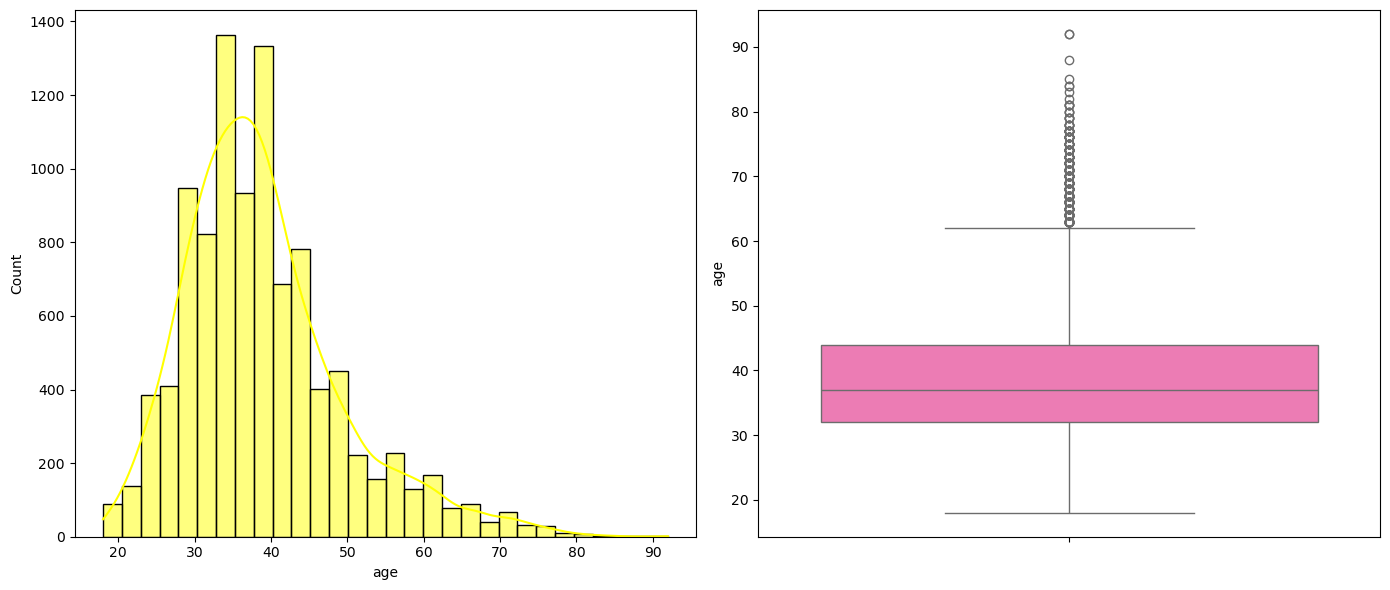

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=df, x='age', bins=30,kde=True,color='yellow')
plt.subplot(122)
sns.boxplot(df['age'],color='hotpink')

plt.tight_layout()
plt.show()

##### Balance Variable Analysis

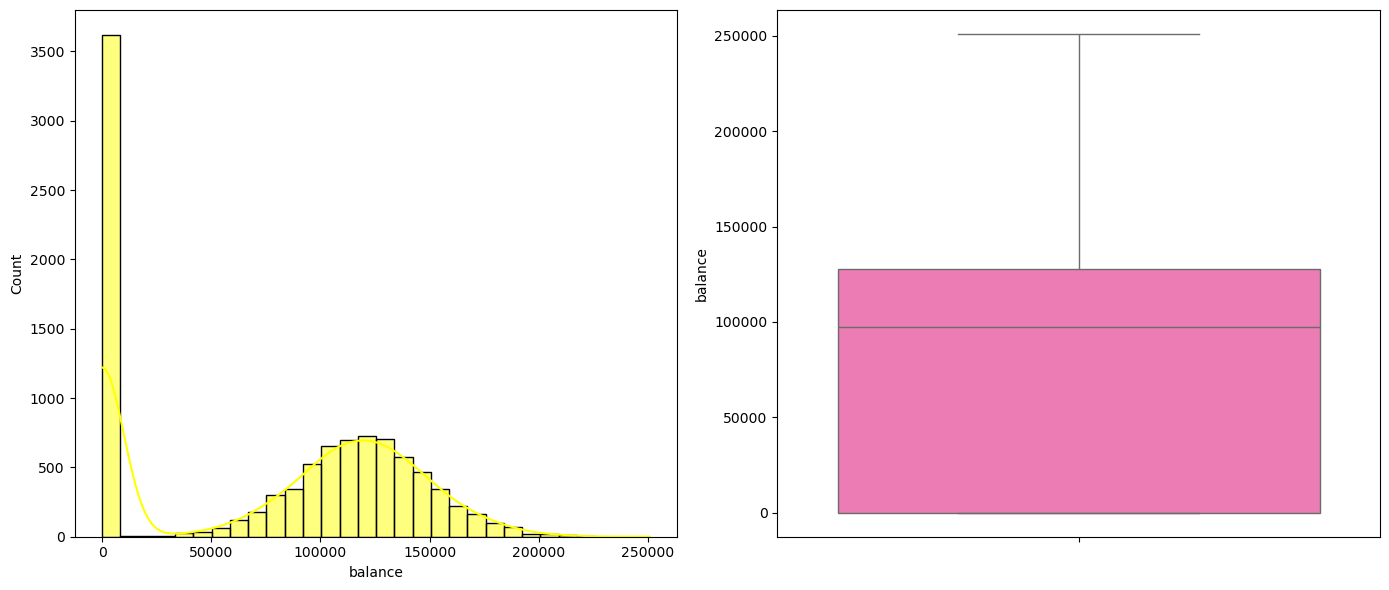

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=df, x='balance', bins=30,kde=True,color='yellow')
plt.subplot(122)
sns.boxplot(df['balance'],color='hotpink')

plt.tight_layout()
plt.show()

##### Estimated Salary Variable Analysis

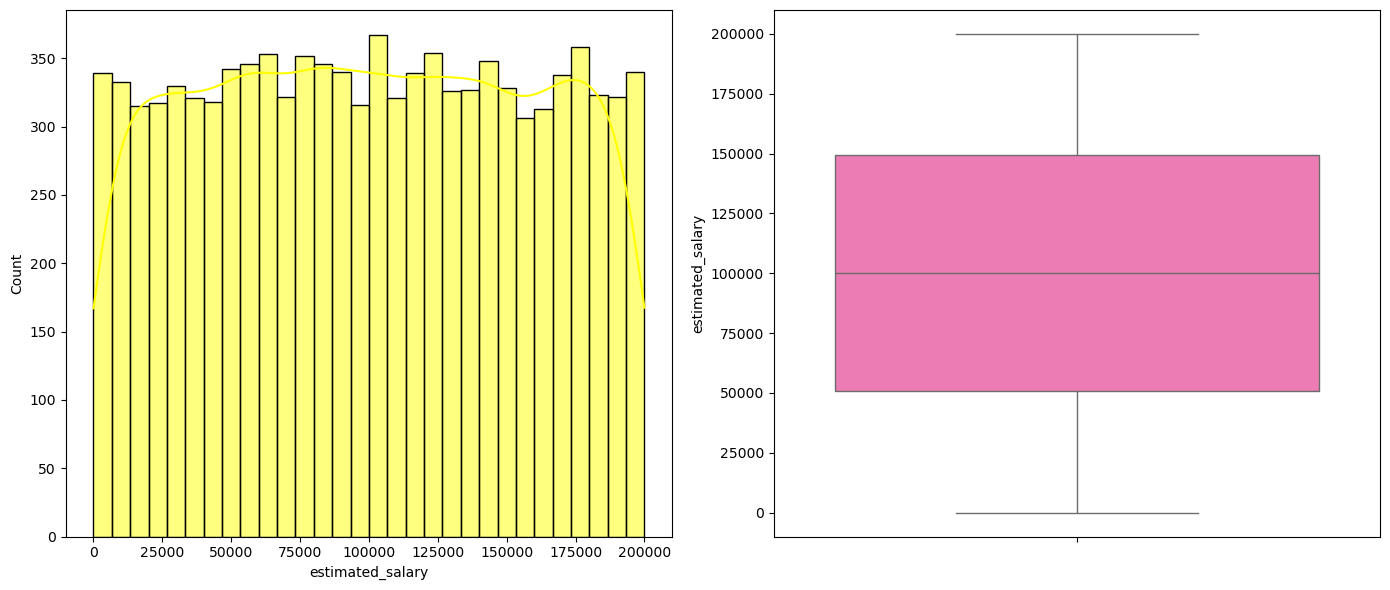

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=df, x='estimated_salary', bins=30,kde=True,color='yellow')
plt.subplot(122)
sns.boxplot(df['estimated_salary'],color='hotpink')

plt.tight_layout()
plt.show()

## Bivariate Analysis

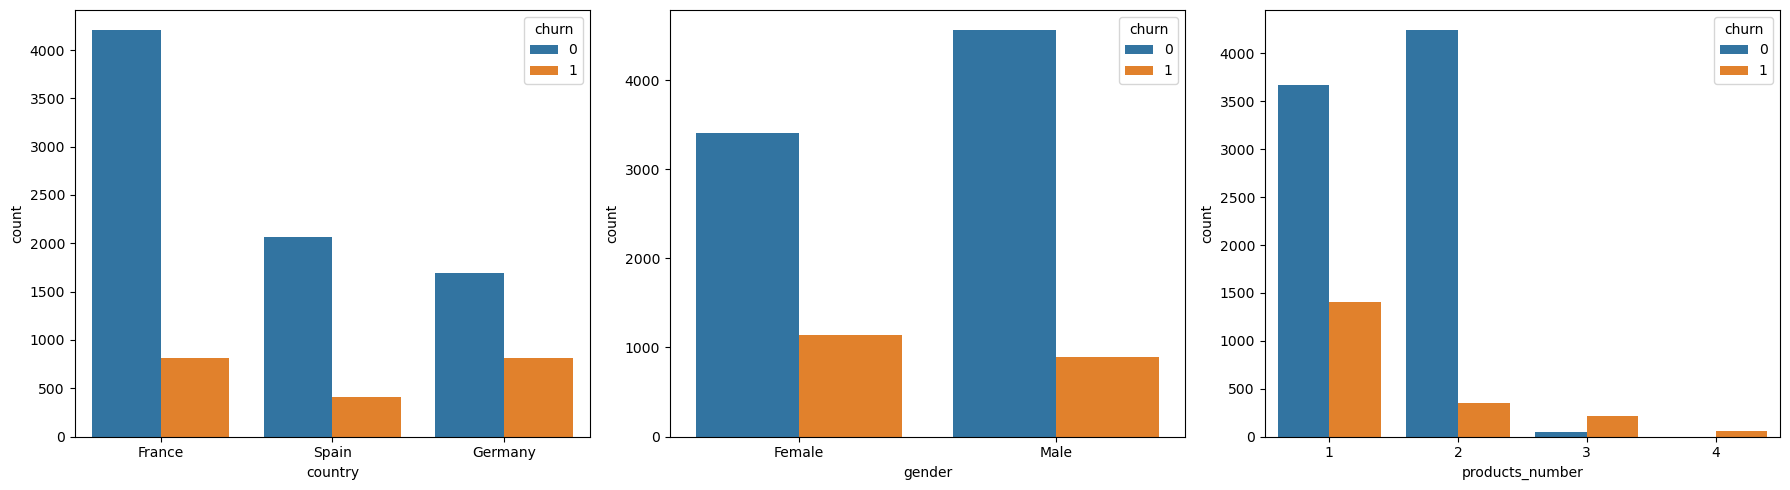

In [31]:
# 2. Categorical Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='country', hue='churn', data=df, ax=axes[0])
sns.countplot(x='gender', hue='churn', data=df, ax=axes[1])
sns.countplot(x='products_number', hue='churn', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

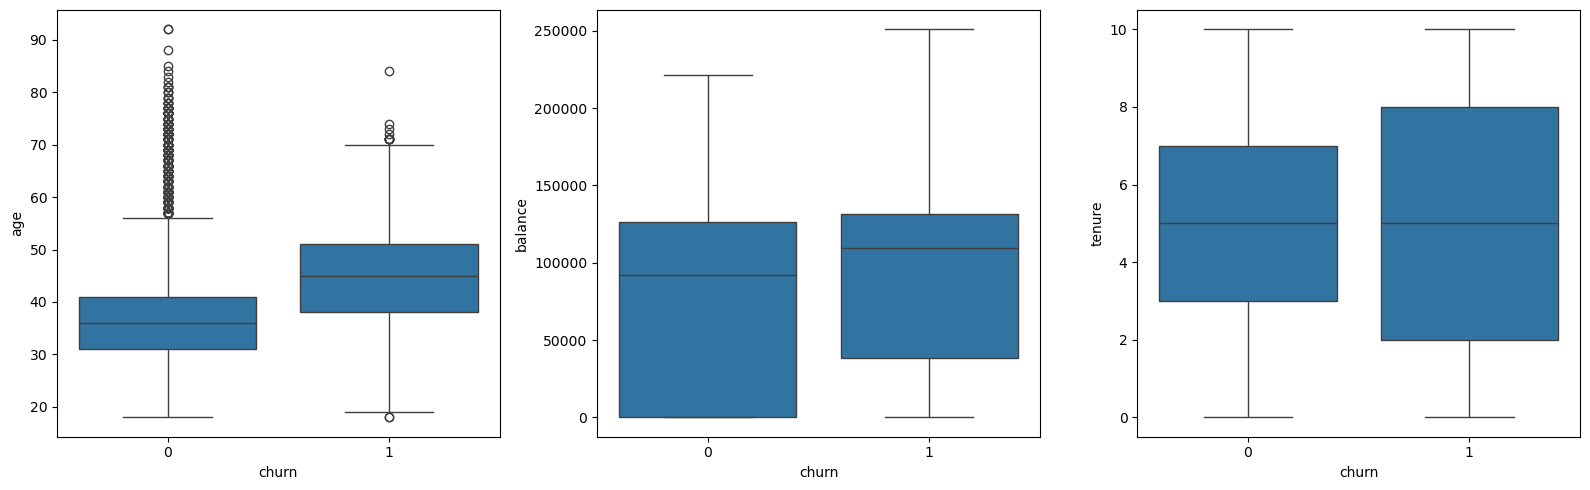

In [32]:
# 3. Numerical Analysis (Boxplots for Outliers/Skew)
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.boxplot(x='churn', y='age', data=df)
plt.subplot(132)
sns.boxplot(x='churn', y='balance', data=df)
plt.subplot(133)
sns.boxplot(x='churn', y='tenure', data=df)

plt.tight_layout()
plt.show()

#### Insights
##### Bivariate Analysis (Key Insights on Churn)
 - Geography: Churn is highest in Germany (approx 32%) compared to France and Spain (approx 16% each).
 - Gender: Female customers have a higher churn rate (approx 25%) than male customers (approx 16.5%).
 - Age: People who are likely to churn are people their Fourties (40)
 - Financial Profile: Customers who churn often have higher average balances (approx 150,000) than those who have (approx 0 - 100,000), Also balance dataset is right-skewed. 


## Multivariate Analysis

In [33]:
dfn = df.drop(columns=['gender','country','customer_id'])

In [34]:
dfn.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


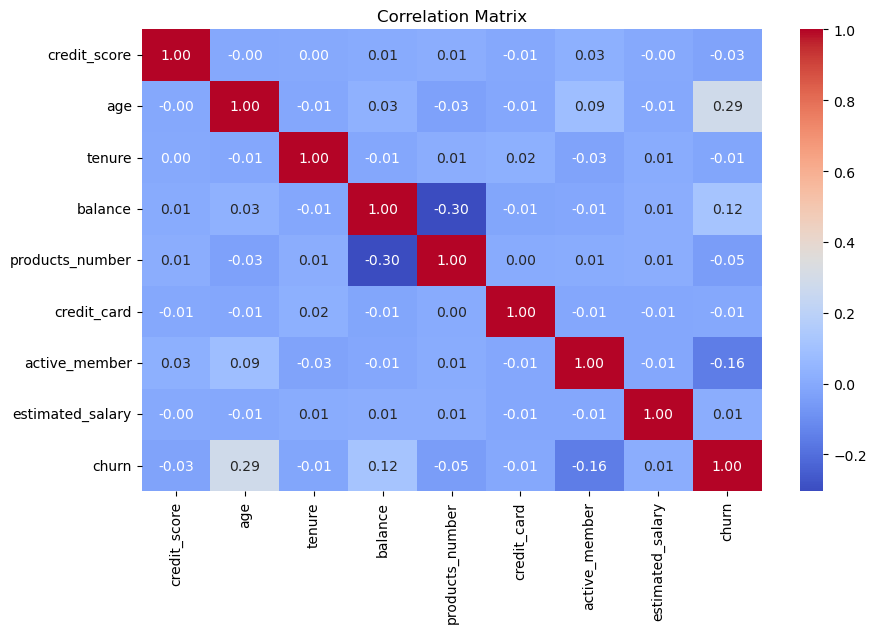

In [35]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dfn.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [36]:
#🧹 Check for Irrelevant Features

# Correlation matrix
corr_matrix = dfn.corr()
print(corr_matrix['churn'].sort_values(ascending=False)) 

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64


## Feature Engineering 

In [37]:
def engineer_features(df):
    df = df.copy()
    # Remove irrelevant identifiers
    df.drop(['customer_id'], axis=1, inplace=True, errors='ignore')
    
    # 1. Balance-to-Salary Ratio: High ratios often indicate churn risk
    df['BalanceSalaryRatio'] = df['balance'] / (df['estimated_salary'] + 1)
    
    # 2. Tenure-by-Age: Standardizes loyalty relative to life stage
    df['TenureByAge'] = df['tenure'] / (df['age'] + 1)
    
    # 3. Credit Score-by-Age: Relationship between financial maturity and age
    df['CreditScoreByAge'] = df['credit_score'] / (df['age'] + 1)
    
    return df

df_engineered = engineer_features(df)


df_engineered.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,BalanceSalaryRatio,TenureByAge,CreditScoreByAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.046512,14.395349
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744670,0.023810,14.476190
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401362,0.186047,11.674419
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025000,17.475000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587035,0.045455,19.318182


In [38]:
# index=False prevents pandas from adding an extra column for the row numbers
df_engineered.to_csv('Bank_Customer_Churn_Engineered.csv', index=False)

print("File saved successfully as 'Bank_Customer_Churn_Engineered.csv'")


File saved successfully as 'Bank_Customer_Churn_Engineered.csv'


In [39]:
verify_df = pd.read_csv('Bank_Customer_Churn_Engineered.csv')
print(verify_df.columns)

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreByAge'],
      dtype='object')
